In [1]:
! pip install pandas

In [2]:
!pip install matplotlib

In [7]:
!pip install scikit-learn

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("nasdaq100.csv",sep=";")
df.head()

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


In [22]:
df.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [3]:
#df=df.drop(columns=['Date'])
df=df.drop(columns=['Date'],errors='ignore')
df.head(len(df))

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700
5,16800,16400
6,15900,16200
7,15800,15500
8,16150,16100
9,16300,15800


Text(0.5, 1.0, 'Stock market')

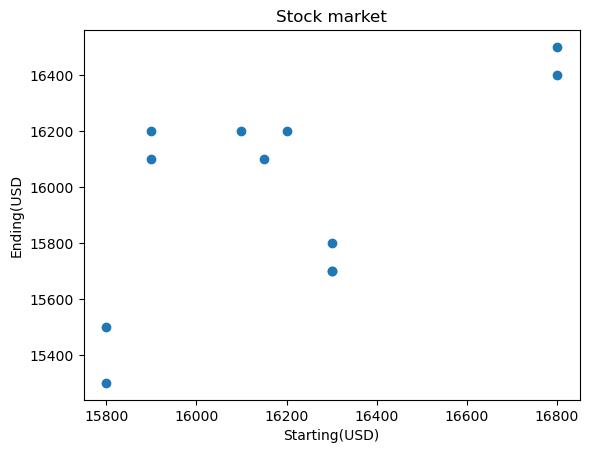

In [4]:
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel("Starting(USD)")
plt.ylabel("Ending(USD")
plt.title("Stock market")

In [10]:
x=df.drop("Ending (USD)",axis=1)
x.head(len(x))

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300
5,16800
6,15900
7,15800
8,16150
9,16300


In [5]:
y=df['Ending (USD)']
y.head(len(y))
y=df[['Ending (USD)']] # into dataframe
y.head(len(y))

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700
5,16400
6,16200
7,15500
8,16100
9,15800


In [15]:
# lineae regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [12]:
x.mean()


Starting (USD)    16195.833333
dtype: float64

In [13]:
y.mean()

Ending (USD)    15975.0
dtype: float64

Text(0.5, 1.0, 'Stock market')

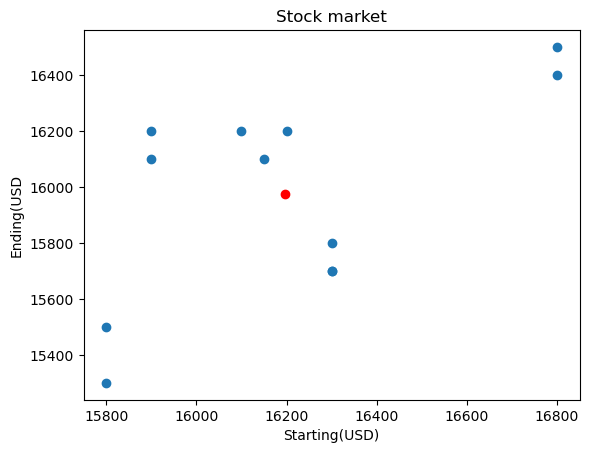

In [18]:
plt.scatter(x.mean(),y.mean(),color='red')
# to find from where the best fited line will go
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel("Starting(USD)")
plt.ylabel("Ending(USD")
plt.title("Stock market")

In [19]:
#by built in mathod
reg.fit(x,y)

LinearRegression()

In [23]:
m=reg.coef_
m

array([[0.65258293]])

In [22]:
c=reg.intercept_
c

array([5405.87555702])

In [28]:
Y=m*16700+c
print(Y)

[[16304.0105628]]


In [30]:
##by built in mathod
reg.predict([[16700]])

C:\Users\power\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

In [34]:
# x y and predicted y
df["Predicted_Y"]=reg.predict(x)
df.head(len(df))

,Starting (USD),Ending (USD),Predicted_Y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389
5,16800,16400,16369.268856
6,15900,16200,15781.944215
7,15800,15500,15716.685922
8,16150,16100,15945.089949
9,16300,15800,16042.977389


Text(0.5, 1.0, 'Stock market')

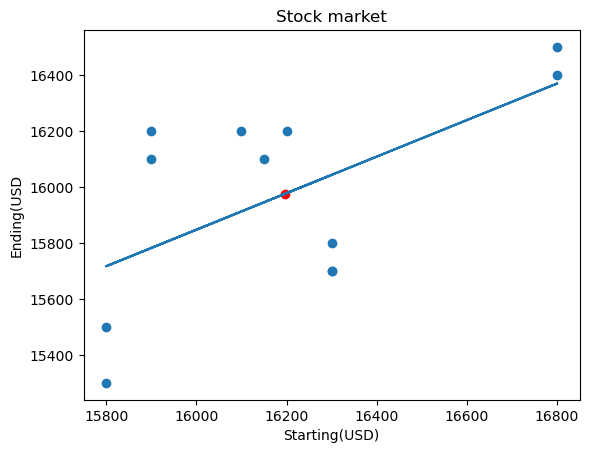

In [36]:
plt.plot(x,reg.predict(x))
plt.scatter(x.mean(),y.mean(),color='red')
# to find from where the best fited line will go
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel("Starting(USD)")
plt.ylabel("Ending(USD")
plt.title("Stock market")

In [37]:
df.head()

,Starting (USD),Ending (USD),Predicted_Y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


In [39]:
df["Loss"]=df['Ending (USD)']-df['Predicted_Y']
df.head()

,Starting (USD),Ending (USD),Predicted_Y,Loss
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389


In [41]:
#cost(total) of linear functin is MAE or MSE(more appropriate)
# mse and mae
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [43]:
mse=mean_squared_error(df['Ending (USD)'],df['Predicted_Y']) # first actual then predicted
mse

80411.23397700385

In [44]:
mae=mean_absolute_error(df['Ending (USD)'],df['Predicted_Y']) # first actual then predicted
mae

260.3840017604666

In [45]:
abs(df['Loss']) # by fucntion

0     130.731144
1     318.055785
2     416.685922
3     287.539198
4     342.977389
5      30.731144
6     418.055785
7     216.685922
8     154.910051
9     242.977389
10    222.280904
11    342.977389
Name: Loss, dtype: float64

In [46]:
sum(abs(df['Loss']))/len(x) # bu manual

260.3840017604666

In [47]:
reg.score(x,y) # 35% error VVI

0.3577804940272571

Text(0.5, 1.0, 'Stock market')

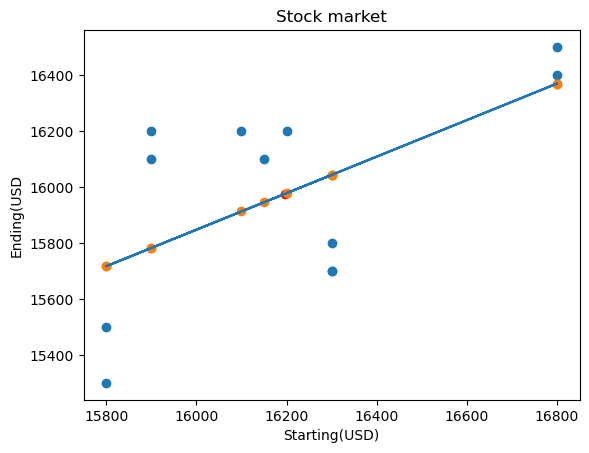

In [48]:
plt.plot(x,reg.predict(x))
plt.scatter(x.mean(),y.mean(),color='red')
# to find from where the best fited line will go
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.scatter(df['Starting (USD)'],reg.predict(x))
plt.xlabel("Starting(USD)")
plt.ylabel("Ending(USD")
plt.title("Stock market")

In [51]:
# video 15 same as score
from sklearn.metrics import r2_score
r2_score(y,reg.predict(x))

0.3577804940272571